In [21]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from composicao_histograma_boxplot import composicao_histograma_boxplot
from composicao_histograma_boxplot import calcular_estatisticas

In [22]:
# Leitura da planilha 
DADOS = r"C:\Users\rodri\OneDrive\Sincronização\Documentos\GitHub\hypothesis_test\teste_hipoteses.xlsx"
df = pd.read_excel(DADOS)

# Visualizar as primeiras linhas da tabela
df.head()

,Operador,Escritório,Home office
0,1,8.9,6.9
1,2,8.3,9.8
2,3,6.4,7.9
3,4,8.5,9.6
4,5,6.2,6.3


In [23]:
# Visualizar as últimas linhas da tabela
df.tail()

,Operador,Escritório,Home office
25,26,7.2,7.7
26,27,6.6,6.9
27,28,8.2,9.2
28,29,9.8,7.4
29,30,8.4,9.6


In [24]:
# Conferir os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Operador     30 non-null     int64  
 1   Escritório   30 non-null     float64
 2   Home office  30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


# Identificação do Problema

Buscando reduzir custos e melhorar a qualidade de vida de seus colaboradores, uma empresa de atendimento decidiu fazer um teste para avaliar se a adoção do home office para os operadores produziria algum efeito negativo na qualidade dos atendimentos.

Para o teste foram selecionados aleatoriamente 30 operadores que tiveram as médias das notas de avaliação (0 a 10) dos clientes registradas nos 2 locais de trabalho.

Com os dados obtidos, como podemos responder a pergunta: "Operadores trabalhando em home office possuem pior avaliação?"

Para responder a pergunta precisamos saber se a média das notas dos clientes para os operadores trabalhando no escritório é estatisticamente maior do que a média das notas dos clientes para os mesmos operadores trabalhando em home office.

Relembrando, a Hipótese Nula sempre apresentará uma igualdade e a Hipótese Alternativa uma desigualdade. Portanto definimos as seguintes hipóteses nula e alternativa:
- H0: As notas no Escritório são iguais as notas em Home Office, ou: NE = NHO
- H1: As notas no Escritório são maiores que as notas em Home Office, ou: NE > NHO

In [25]:
media = df[['Escritório', 'Home office']].mean().round(1)
desvio_padrao = df[['Escritório', 'Home office']].std().round(1)

print("Comparação das médias amostrais")
print(media)
print("------------")
print("Comparação dos desvios amostrais")
print(desvio_padrao)

Comparação das médias amostrais
Escritório     7.8
Home office    7.4
dtype: float64
------------
Comparação dos desvios amostrais
Escritório     1.2
Home office    1.5
dtype: float64


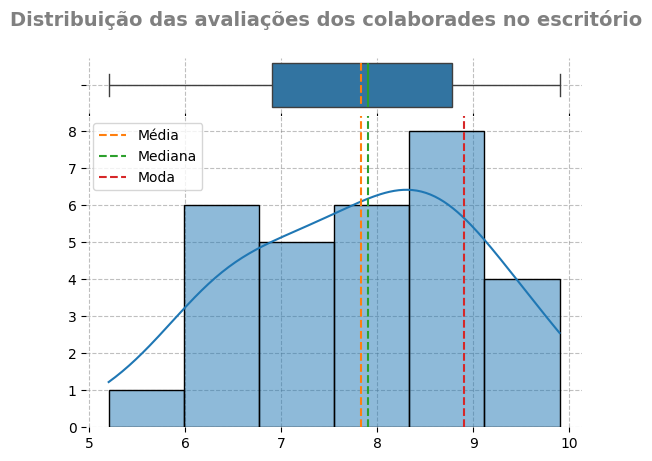

In [26]:
composicao_histograma_boxplot(df, 'Escritório', titulo="Distribuição das avaliações dos colaborades no escritório")

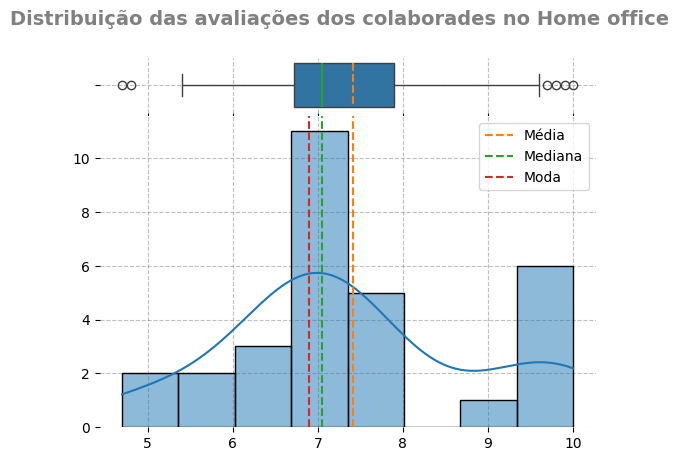

In [27]:
composicao_histograma_boxplot(df, 'Home office', titulo="Distribuição das avaliações dos colaborades no Home office")

In [34]:
# Supondo que as duas colunas sejam 'amostra1' e 'amostra2'
amostra1 = df['Escritório']
amostra2 = df['Home office']

# Teste t pareado
t_stat, p_value_bi = stats.ttest_rel(amostra1, amostra2)

# Teste unicaudal à direita (dividir p-valor por 2)
p_value_one_tailed = p_value_bi / 2

# Exibir resultados
print(f"Estatística t: {t_stat:.5f}")
print(f"p-valor (unicaudal à direita): {p_value_one_tailed:.5f}")

# Interpretação
alpha = 0.05
if (p_value_one_tailed < alpha) and (t_stat > 0):
    print("Rejeitamos H₀ → A média do Escritório é significativamente maior que a do Home Office.")
else:
    print("Não rejeitamos H₀ → Não há evidência suficiente para afirmar que a média do Escritório é maior.")

Estatística t: 1.21895
p-valor (unicaudal à direita): 0.11634
Não rejeitamos H₀ → Não há evidência suficiente para afirmar que a média do Escritório é maior.


Já sabemos que p-valor indica o quão plausível é H0, e neste caso, o valor calculado de 12% indica que H0 é plausível.

Como o p-valor de 12% é maior que o nível de significância de 5%, podemos concluir que não existem evidências estatísticas suficientes contra H0 , ou seja, não rejeitamos H0.

Relembrando as hipóteses definidas:
- H0: As notas no Escritório são iguais as notas em Home Office, ou: NE = NHO
- H1: As notas no Escritório são maiores que as notas em Home Office, ou: NE > NHO

E como não rejeitamos H0 , podemos dizer que não existem evidências estatísticas de que a média das notas dos operadores no Escritório não seja igual a média das notas dos mesmos operadores em Home Office.